# <center> Topic Modeling </center>

- This lecture is created based on 
    * Blei. D. (2012), "Probabilistic Topic Models", http://www.cs.columbia.edu/~blei/talks/Blei_ICML_2012.pdf
    * Topic Modeling with Scikit Learn: https://medium.com/@aneesha/topic-modeling-with-scikit-learn-e80d33668730

## 1. Introduction

- Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.
  - Discover the hidden themes that pervade the collection.
  - Annotate the documents according to those themes.
  - Use annotations to organize, summarize, and search the texts.
- Formal Definition
<img src='topic_modeling.png' width='70%'>
  - **Topics**: each topic is a **distribution over words** 
    - e.g. for topic "Gentics", $p('gene'~|~'Genetics')~=~0.04$, $p('dna'~|~'Genetics')=0.02$
    - $K$ topics $\theta_1, \theta_2, ..., \theta_K$, $N$ words $w_1, w_2, ..., w_N$ in corpus, we need to know  $p(w_i|\theta_j)$ for $i \in N$ and $j\in K$
  - **Document ($d$)**: a **mixture of topics**
    - e.g. for above document $d$, $p('Genetics'~|~d)=0.5$, $p('LifeScience'~|~d)=0.15$, ...
    - In general, given document $d$ and topic $\theta_j$, we need to know $p(\theta_j~|~d)$, i.e. **topic proportion**


## 2. Statistical Language Model
- Definition: given a corpus with $M$ documents, $N$ words, $K$ topics, a model contains the following probabilities:
  - topic probability distribution in corpus: <br>$p(\theta_j)$ for $j \in K$, $\sum_{j\in K}{p(\theta_j)}=1$
  - topic distribution per document $d$ (document assignment): <br>$p(\theta_j~|~d)$, $\sum_{j\in K}{p(\theta_j~|~d)}=1$ 
  - word distribution per topic (why do we need to know it?): <br> $p(w_i~|~\theta_j)$ for $i \in N$ and $j\in K$, $\sum_{i\in N}{p(w_i~|~\theta_j)}=1$ 
  <img src='language_model.png' width='30%'>

## 3. How to estimate these probabilities?
### 3.1. Supervised learning - Naive Bayes
- Topic probability: 
$$ p(\theta_j) = \frac{\text{documents in topic } j} {\text{total documents}}$$  
- Word distribution per topic: 
$$ p(w_i~|~\theta_j)= \frac{\text{count of word } w_i \text{ in topic } j} {\text{total word count in documents of topic }j}$$  
- Topic distribution per document: 
$$ \begin{array}{l}
 p(\theta_j~|~d) = \frac{p(d|\theta_j) * p(\theta_j)}{p(d)} \text{         # Bayesian rule}\\
 C_{MAP} = \underset{\theta}{\operatorname{argmax}}{p(d~|~\theta)*p(\theta)} \text{         # maximum a posteriori}\\
    C_{MAP} = \underset{\theta}{\operatorname{argmax}}{p(w_1,w_2, ...,w_N~|~\theta)*p(\theta)} \\
    C_{MAP} = \underset{\theta}{\operatorname{argmax}}({\prod_{i \in N} {p(w_i~|~\theta)})*p(\theta)}  \textit{ # independence assumption}
  \end{array}$$  
- Naive Bayes model is also a kind of language model

### 3.2. Generative Model for Unsupervised learning 
- We don't have labeled data; we only observe the documents
- We **cannot** estimate $p(\theta_j)$ and $p(w_i~|~\theta_j)$ as above
- Instead, we use a **generative model** that describes how a document $d$ was created
  1. decide on document length $N$, e.g. 100 words
  2. decide on topic mixture (i.e. $p(\theta_j~|~d)$), e.g. 70% about genetics and 30% about life science, ...
  3. for each of the N words,
     - 3.1. choose a topic from the topic mixture, e.g. "genetics"
     - 3.2. choose a word from based on the probabilities of words in the topic (i.e. $p(w_i~|~\theta_j)$), e.g. "gene"
     - At the end, you may get a document such as "gene dna life ..."
- We assume all documents in the dataset were generated following this process. Then we infer these probabilities from samples such that these probabilities have the maximum likelihood to generate the samples
- Probabilities $p(w_i~|~\theta_j)$ and $p(\theta_j~|~d)$ are **hidden structures** to be discovered, a.k.a **latent variables**
<img src='latent_structure.png' width='70%'>
  


## 4. Latent Dirichlet Allocation (LDA)
- A generative model which generates a document $d$ as follows:
  1. Choose document length $N$ ∼ Poisson(ξ).
  2. Choose topic mixture $\theta$ ~ Dir(α).
  3. For each of the $N$ words $w_n$:
     - (a) Choose a topic assignment $z_n$ ∼ Multinomial(θ).
     - (b) Choose a word $w_n$ from the topic, $z_n$ ∼ Multinomial($\beta_{z_n}$), where $\beta_{z_n}$ is the word distribution for assigned topic $z_n$, i.e. $p(w_n~|~z_n)$     
- A few distributions
  - Poisson(ξ) : a given number of events occurring in a fixed interval of time/space with rate ξ independently of the time/space since the last event
  - Multinomial(θ) & Multinomial($\beta$): 
    - suppose X is a vector which represents n draws of a random variable with three possible outcomes (i.e. words), say A, B, C. 
    - e.g. when n=10, an example draw of X could be x = [4,4,2], i.e., A occured 4 times, B 4 times, and C 2 times 
    - assume three outcomes have probability θ={$\beta_A$, $\beta_B$,$\beta_C$} respectively (i.e. 0.5,0.3,0.2)
    - the multinomial distribution describes the prob. mass distribution of X, $$ multinomial(X=[4,4,2]) = \frac{10!}{4!4!2!}\beta_A^{4}\beta_B^{4}\beta_C^{2}$$ 
  - Dir(α) : is a probability distribution with parameter $α, e.g. \{α_1,α_2,α_3\}$ to generate $θ, e.g. \{ θ_1,θ_2,θ_3\}$. For details of Dirichlet function, check videos e.g. https://www.youtube.com/watch?v=nfBNOWv1pgE 
  <img src='dirichlet.svg'>
    - Dirichlet distribution is conjugate to the multinomial.
    - Given a multinomial observation, the posterior distribution of θ is a Dirichlet.
    - In LDA, usually $α_1=α_2=α_3=...=\frac{1}{K}$
- Common techniques to estimate these probabilities are EM (Expectation-Maximization), Gibbs Sampling (See Blei's paper for details)


### 4.1. Estimate parameters by Gibbs Sampling
- General ideas of Gibbs sampling
  - In statistics, Gibbs sampling or a Gibbs sampler is a Markov chain Monte Carlo (MCMC) algorithm for obtaining a sequence of observations which are approximated from a specified multivariate probability distribution, when direct sampling is difficult (from *Wikipedia*).
  - e.g.  by bayes inference, $p(x, y)=p(x|y)~p(y)=p(y|x)~p(x)$. If it's difficult to determine the nature of $p(x, y)$, while it is easy to sample from $p(y|x)$  and $p(x|y)$, then we can obtain a sequence of observations approximating $p(x, y)$ by sampling $p(y|x)$ and $p(x|y)$. 
  - Let's assume:
    * $p(y|x)$ \~ $N(x,\sigma_1)$
    * $p(x|y)$ \~ $N(y,\sigma_2)$ 
    * Now we need to have 100 $(x,y)$ samples so that we can understand the nature of $p(x,y)$
  - The Gibbs sampler proceeds as follows:
    1. set $x$ and $y$ to some initial starting values 
    2. Replace $x$ by a new value obtained by sampling $x|y$, then update $y$ by sampling from $y|x$, 
    3. Repeat step 2 until the estimates of parameters converge.
- Outline of Gibbs Sampling in LDA
  1. Go through each document and randomly assign each word in the document to one of the $K$ topics, i.e. $p(z_i=j~|~w_i, d)$, where $z_i=j$ denotes word $i$ is assigned to topic $j$. 
  2. Calculate the following
     - $p(w_i~|~\theta_j)$ (word-topic matrix): calculated as the count of each word being assigned to each topic. 
     - $p(\theta_j~|~d)$ (document-topic matrix): the number of words assigned to each topic for each document 
  3. Update $p(z_i=j~|~w_i, d)$ using $p(w_i~|~\theta_j)$ and $p(\theta_j~|~d)$ as follows:
     - For each document $d$, and each word $w_i$, reassign a new topic $j$ to $w_i$, where we choose topic $j$ is sampled from [1, 2, ..., $K$] with a probability ${\propto}~ (w_i~|~\theta_j) * p(\theta_j~|~d)$ (conditional posterior distribution)
     - i.e. Given $w_i$, $d$, $z_{-i}$ (topic assignment of all other words in $d$), $$p(z_i=j~|~w_i, z_{-i}, d)~{\propto}~p(w_i~|~z_i=j, z_{-i}, d) * p(z_i=j~|~z_{-i}, d)~{\propto}~(w_i~|~\theta_j) * p(\theta_j~|~d)$$ 
  4. Repeat steps 2-3 until $p(w_i~|~\theta_j)$ and  $p(\theta_j~|~d)$ converge.
- For more implementation details, check http://ethen8181.github.io/machine-learning/clustering_old/topic_model/LDA.html

### 4.2 Evaluate Topic Model - Perplexity
- For a single document $d$ with $N_d$ words $\{w_1, w_2, ..., w_{N_d}\}$, denoted as $\textbf{W}_d$
$$
  perplexity(d)= exp({H(d)}),  
  H(d) = - \frac{ln (p(\textbf{W}_d))}{N_d}  
$$
- $p(\textbf{W}_d)$, the probability of seeing a document $d$, can be calculated based on:
   - word distribution per topic, i.e. $p(w_i~|~\theta_j$, and 
   - topic mixture, i.e. $p(\theta_j~|~d)$
- For a test set of D with M documents
$$ perplexity(d)= exp({H(D)}), H(D) = - \frac{\sum_{d \in D} {ln   (p(\textbf{W}_d)})}{\sum_{d \in D}{N_d}} $$
- Intutition: 
  - A lower perplexity score indicates better generalization performance
  - Minimizing H(d) is equivalent to maximizing log likelihood
- To evaluate a topic model, calcuate perplexity on **testing dataset** (i.e. evaluating how generaalized the model is)
- Note: if you have some labeled data, you should also conduct **external evaluation**, i.e. 
  - map each topic to a labeled class, 
  - compute precision/recall from the labeled data

## 5. Experiement with LDA
- A few libraries available for LDA: gensim, lda, sklearn
- We use sklearn here since it has a good text preprocessing module

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Exercise 5.1. Load 20 news group data
import json
from numpy.random import shuffle

data=json.load(open('ydata.json','r'))

# shuffle the data
shuffle(data)

text,label=zip(*data)
text=list(text)
label=list(label)

print(text[0])
print(label[0])

judge blocks use of adrien brody s image in film los angeles a federal judge has blocked the makers of a thriller film starring adrien brody from using the oscar winning actor s likeness until he is fully paid for his role u s district judge dale s fischer issued a ruling monday blocking the makers of giallo from continuing to distribute market or sell giallo in the united states brody sued last month before the film went on sale in the states claiming he was owed and its dvd release could cost him million in a sworn declaration he said the film s producers lied to him about financing and vastly overstated how much the film s italian distribution rights were worth the actor tried unsuccessfully to block the film s sale but fischer s ruling states brody is likely to win the case and his likeness can no longer be used in the film or to promote it the ruling also states brody is suffering and will continue to suffer immediate and irreparable harm unless the injunction was granted brody s 

In [27]:
len(text)

6426

In [4]:
# Exercise 5.2. Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# LDA can only use raw term counts for LDA
# can't use tf idf for LDA
tf_vectorizer = CountVectorizer(max_df=0.90, \
                min_df=50, stop_words='english')
tf = tf_vectorizer.fit_transform(text)

# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

print(tf_feature_names[0:10])
print(tf.shape)

# split dataset into train (90%) and test sets (10%)
# the test sets will be used to evaluate proplexity of topic modeling
X_train, X_test = train_test_split(\
                tf, test_size=0.1, random_state=0)

['aaron', 'abandoned', 'abc', 'ability', 'able', 'abroad', 'absolutely', 'abuse', 'academy', 'accelerate']
(6426, 4273)


In [6]:
# Exercise 5.3. Train LDA model
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 4

# Run LDA. For details, check
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

# max_iter control the number of iterations, how many time want to update the gribb sampling
# evaluate_every determines how often the perplexity is calculated
# n_jobs is the number of parallel threads
# verbose means detailed message
# perplexity decreases less, should stop
lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=10,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 10, perplexity: 1633.2390
iteration: 2 of max_iter: 10, perplexity: 1618.2984
iteration: 3 of max_iter: 10, perplexity: 1613.9146
iteration: 4 of max_iter: 10, perplexity: 1611.8971
iteration: 5 of max_iter: 10, perplexity: 1610.6921
iteration: 6 of max_iter: 10, perplexity: 1609.9127
iteration: 7 of max_iter: 10, perplexity: 1609.3522
iteration: 8 of max_iter: 10, perplexity: 1608.5787
iteration: 9 of max_iter: 10, perplexity: 1608.1771
iteration: 10 of max_iter: 10, perplexity: 1607.9173


In [7]:
# Exercise 5.4. Check topic and word distribution per topic

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space in all documents

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('com', 5797.229991856857), ('company', 4214.2533182366415), ('new', 3547.458932403322), ('business', 3258.218783202373), ('www', 3208.216298220313), ('information', 2965.96062308147), ('services', 2316.772273243709), ('products', 2054.062687317659), ('market', 1975.735038885239), ('technology', 1975.2156240187508), ('http', 1862.773886866821), ('industry', 1854.8405028738828), ('service', 1726.2880303931267), ('companies', 1573.1223652502636), ('customers', 1561.3329932867161), ('based', 1505.0790585989407), ('solutions', 1490.8358805496875), ('available', 1482.6734171596133), ('online', 1463.8483399249844), ('term', 1463.2801058127798)]


Topic 1:
[('said', 10415.01383701773), ('police', 3678.5060969171677), ('court', 2293.9372149015558), ('year', 2195.396504528839), ('people', 1819.4314276722318), ('state', 1623.1636120026803), ('years', 1579.037428552963), ('case', 1570.4192671757362), ('told', 1557.2106645515514), ('old', 1390.004168829217), ('man', 1375.0922430891871), 

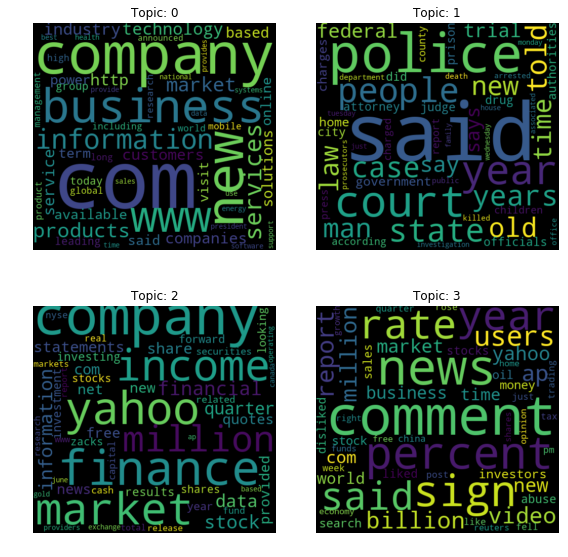

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

# at here, choose top 50 words
num_top_words=50
f, axarr = plt.subplots(2, 2, figsize=(8, 8));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()



In [15]:
# Exercise 5.5. Assign documents to topic (topic proportion per document)
import numpy as np

# Generate topic assignment of each document
topic_assign=lda.transform(X_train)

print(topic_assign[0:5])

# set a probability threshold
# the threshold determines precision/recall
# high precision if threshold is higher
# high recall if low
prob_threshold=0.25

topics=np.copy(topic_assign)
topics=np.where(topics>=prob_threshold, 1, 0)
print(topics[0:5])


[[9.81121168e-01 5.99865501e-03 6.69391401e-03 6.18626295e-03]
 [6.05089866e-01 2.81008334e-02 9.51635420e-03 3.57292947e-01]
 [6.74655030e-04 9.97944966e-01 6.96165247e-04 6.84213836e-04]
 [6.71509359e-01 5.94305876e-02 1.28214973e-03 2.67777904e-01]
 [9.82394112e-01 1.57366714e-02 9.34819363e-04 9.34397605e-04]]
[[1 0 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [1 0 0 1]
 [1 0 0 0]]


In [19]:
# Exercise 5.6. Evaluate topic models by perplexity of "test" data
# because training dataset always has the best perplexity

perplexity=lda.perplexity(X_test)
print(perplexity)


1991.6060159919753


### 5.1. Find the number of topics ($K$)
- There are no "golden" rules to find K.
- Perplexity may be one way for you to find the number of topics
    - Typically, the best number of topics should be around the **lowest perplexity**
- However, in practice, a few factors need to be considered:
  - It is usually difficult for human to understand or visulaize a big number of topics (I'd suggest K < 20)
  - You may manually scan the data to figure out possible topics in the data, but these topics may not be correlated with the hidden structure discovered by LDA
  - Usually, after LDA, we need manually inspect each discovered topic, merge or trim topics to get semantically coherent but distinguishable topics

In [20]:
# Exercise 5.7. How to find the best number of topics?
# Vary variable num_topics, e.g. set it to 2, 3, 5, ...
# For each value, train LDA model, calculate perplexity on the test data

In [21]:
import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,25):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=10,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)

2 2091.8204956459845
3 2040.2015180841738
4 1991.6060159919753
5 1985.7370971328737
6 2013.3066046186973
7 2029.6775516001603
8 2035.2612052794295
9 2039.1312184984345
10 2085.586586689998
11 2124.952449149102
12 2163.689636388358
13 2166.865093199943
14 2226.8027135155653
15 2250.6118261288984
16 2256.5876719105877
17 2267.0940713887153
18 2287.879718335066
19 2343.212897169636
20 2299.828919214688
21 2320.3713024371245
22 2356.978725885676
23 2358.572976807567
24 2350.3862953484513


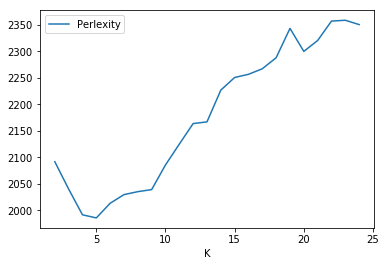

In [22]:
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

## 6. Non-Negative Matrix Factorization (NMF)

- NMF is similar to LDA with different mathematical underpinning. It decompose document-term matrix into the product of 
  - feature matrix (i.e. word distribution per topic) and 
  - weight matrix (i.e. topic mixture per document) 
- NMF is very efficient for small matrix

In [23]:
# Exercise 6.1. NMF transformation

from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# NMF is able to use "tf-idf"
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=20, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names[0:10])
print(tfidf.shape)

X_train, X_test = train_test_split(tfidf, test_size=0.1, random_state=0)

no_topics = 4

# Run NMF
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
# init: ‘nndsvd’: Nonnegative Double Singular Value Decomposition (NNDSVD) better for sparseness
# alpha: regularization (in neural network)

nmf = NMF(n_components=no_topics, \
          random_state=1, alpha=0.01, init='nndsvd').fit(X_train)

['aa', 'aaa', 'aapl', 'aaron', 'abandoned', 'abandons', 'abc', 'ability', 'able', 'aboard']
(6426, 7805)


In [24]:
# Exercise 6.2. Get topic words

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space

# returns weights under each word under each topic
for topic_idx, topic in enumerate(nmf.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tfidf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('company', 0.748437869854427), ('com', 0.6420519135306118), ('percent', 0.6023458436709757), ('million', 0.49082831874795085), ('business', 0.4327301476773463), ('quarter', 0.4301280194343687), ('www', 0.38988482737896213), ('sales', 0.3857647656192834), ('market', 0.3814207204471293), ('new', 0.37370588728683773), ('products', 0.3507912702669233), ('statements', 0.3433807699287089), ('companies', 0.33809786180305673), ('information', 0.32548321920671014), ('services', 0.3099489223160091), ('year', 0.3088120893955487), ('shares', 0.3085946196476054), ('stock', 0.3069847132249901), ('technology', 0.3062969827358594), ('billion', 0.2986209877164282)]


Topic 1:
[('said', 1.0880294496597456), ('police', 0.8530257324708445), ('court', 0.4172066621569252), ('man', 0.3688387770250652), ('comment', 0.3614476239272938), ('year', 0.31052132617726036), ('old', 0.3069059538250813), ('told', 0.2901523550704195), ('people', 0.2860698057699091), ('case', 0.27987608049270996), ('say', 0.27

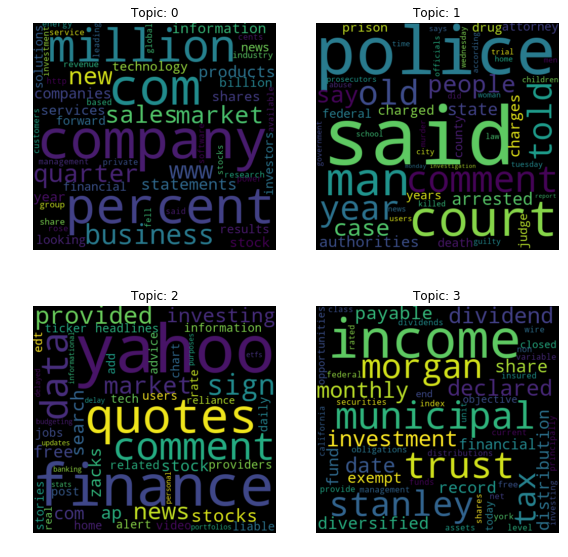

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=50
f, axarr = plt.subplots(2, 2, figsize=(8, 8));

for topic_idx, topic in enumerate(nmf.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tfidf_feature_names[i]:topic[i] \
       for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()

In [26]:
# Exercise 6.3. Assign document to topics

import numpy as np
from sklearn.preprocessing import normalize

topic_assign=nmf.transform(X_train)

print(topic_assign[0:5])

# normalized each row into probability
topics=normalize(np.copy(topic_assign), axis=1, norm='l1')
print(topics[0:5])

# find a threshold to maximize f-score
prob_threshold=0.25

topics=np.where(topics>prob_threshold, 1, 0)
print(topics[0:5])

[[0.0283182  0.         0.         0.        ]
 [0.02259788 0.01059129 0.00527119 0.        ]
 [0.         0.08270412 0.         0.        ]
 [0.02741213 0.01024595 0.00483697 0.        ]
 [0.03155394 0.00958465 0.         0.        ]]
[[1.         0.         0.         0.        ]
 [0.58756293 0.27538194 0.13705513 0.        ]
 [0.         1.         0.         0.        ]
 [0.64506648 0.24110931 0.11382421 0.        ]
 [0.76701569 0.23298431 0.         0.        ]]
[[1 0 0 0]
 [1 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]]
